In [10]:
import os
import torch
import pywt
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import cv2
import librosa
import numpy as np

class VideoDataset(Dataset):
    def __init__(self, file_path, cache_into_memory=False):
        self.file_path = file_path
        self.cache_into_memory = cache_into_memory
        self.name_list = self._get_video_names()

    def _get_video_names(self):
        return os.listdir(self.file_path)

    def __getitem__(self, index, frame_size=(144, 256)):
        video_name = os.path.join(self.file_path, self.name_list[index])
        video_cap = cv2.VideoCapture(video_name)
        frames = []
        success, frame = video_cap.read()
        while success:
            transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                transforms.Resize(frame_size),
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                transforms.Grayscale(num_output_channels=1),
            ]) # [F, C, H, W]
            frame = transform(frame)
            # frame = self.__canny_transform(frame[0])
            frame = self.__haar_transform(frame[0])
            frame = torch.tensor(frame)
            frames.append(frame)
            success, frame = video_cap.read()
        video_cap.release()
        video_tensor = torch.stack(frames)
        return video_tensor
    
    def __canny_transform(self, frame):
        return cv2.Canny(np.uint8(frame.numpy()), 100, 200)
    
    def __haar_transform(self, frame):
        coeffs2 = pywt.dwt2(frame, 'haar')
        LL, (LH, HL, HH) = coeffs2
        res = LH + HL + HH
        res = np.abs(res)
        res = np.where(res > res.mean() + 1.5 * res.std(), 1, 0)
        return res

    def __len__(self):
        return len(self.name_list)


In [11]:

videos = VideoDataset('../data/compressed_index/')

In [12]:
video = videos.__getitem__(0) #49 sec with haar transform
# video.shape

TypeError: Invalid file: < cv2.VideoCapture 000001C531891CF0>

In [6]:
vid1 = torch.stack(video)

In [4]:

vid = torch.stack(video)

In [5]:
vid.shape

torch.Size([16360, 72, 128])

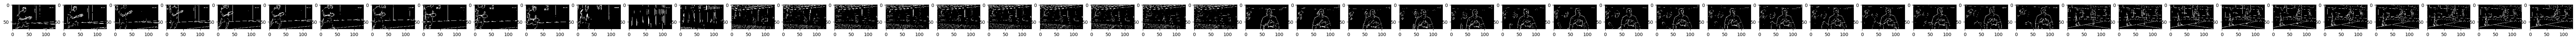

In [29]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 50, figsize=(10, 10))

figure.set_size_inches(100,100)

for i in range(50):
    axis[i].imshow(vid[50+i], cmap='gray')

plt.show() 

In [13]:
videos.name_list[0]

'023114a7952a10d21c3d5c177b5a8351.mp4'

In [7]:
vid11 = vid1.numpy()

In [11]:
vid11.shape
img = vid11[10].astype(np.uint8)

cv2.imshow('image', img)

# Waits for a keystroke
cv2.waitKey(0)  
 
# Destroys all the windows created
cv2.destroyAllwindows() 

AttributeError: module 'cv2' has no attribute 'destroyAllwindows'

: 

In [10]:


for image in vid11:
    cv2.imshow("frame", image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows() 

error: OpenCV(4.9.0) D:/a/opencv-python/opencv-python/opencv/modules/highgui/src/precomp.hpp:155: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'
